In [1]:
import sys
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import seaborn

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataset as dataset
import snelib19odp.const as const
import snelib19odp.utils as utils
import snelib19odp.analysis.late_nickel as late_nickel

In [2]:
ds = dataset.load_dataset('SN2019odp_phot')

In [3]:
t_min = 40

In [4]:
N = 400
m_ni = np.empty(N)
t0 = np.empty(N)
nidx = np.empty(N)
for i in range(N):
    p,pcov = late_nickel.sample_fit(ds, bolometric_method='lyman', texpl_mjd=58714.5, t_min=t_min)
    m_ni[i] = p[1]
    t0[i] = p[0]
    #nidx[i] = p[2]

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


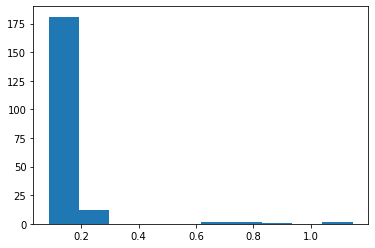

In [5]:
plt.hist(m_ni);

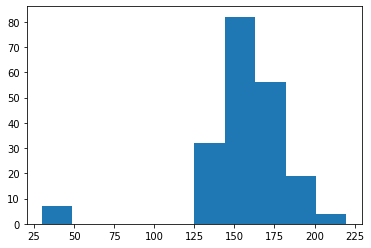

In [6]:
plt.hist(t0);

In [7]:
#plt.hist(nidx);

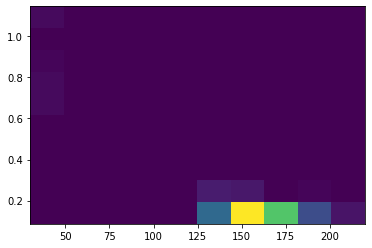

In [8]:
plt.hist2d(t0, m_ni);

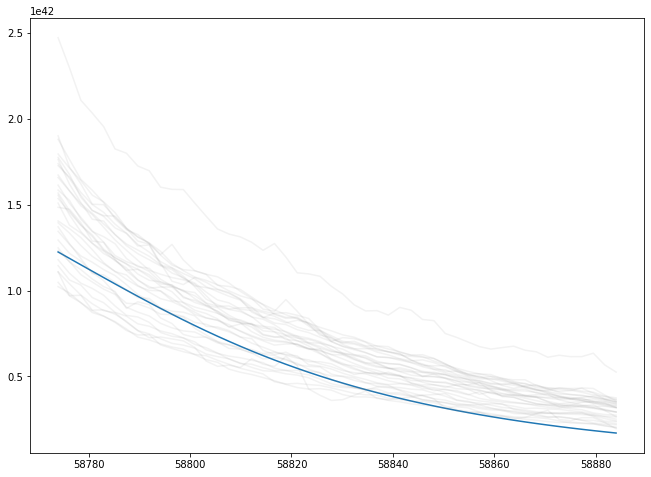

In [9]:
plt.figure(figsize=(11,8))
t_grid = ds.transient.prior_t0 + np.linspace(t_min, 150)
#plt.plot(t_grid, late_nickel.total_deposition(t_grid-58714.5, 110, 0.15, 1.5));
plt.plot(t_grid, late_nickel.total_deposition(t_grid-58714.5, 110, 0.15));
for i in range(30):
    plt.plot(t_grid, utils.convert_luminosity(ds.sample_abs_lc('lyman', t_grid=t_grid)), alpha=0.1, color='grey')

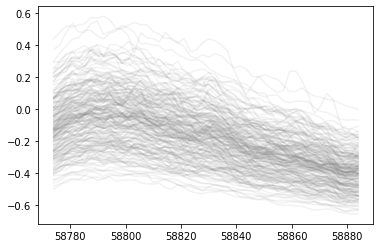

In [10]:
N = 200
t_grid = ds.transient.prior_t0 + np.linspace(t_min, 150)
for i in range(N):
    p,pcov = late_nickel.sample_fit(ds, bolometric_method='lyman', texpl_mjd=58714.5, t_min=t_min)
    #lum_ln = late_nickel.total_deposition(t_grid-58714.5, 110, 0.15, 1.5)
    lum_ln = late_nickel.total_deposition(t_grid-58714.5, 110, 0.15)
    lum_abs = utils.convert_luminosity(ds.sample_abs_lc('lyman', t_grid=t_grid))
    plt.plot(t_grid, (lum_ln-lum_abs)/lum_abs, color='grey', alpha=0.1)

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


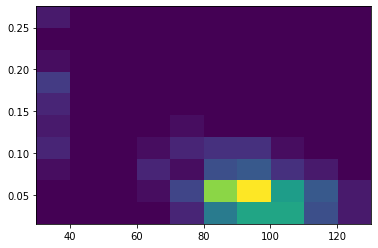

In [11]:
# now try the same for SN2008D
ds = dataset.load_dataset('SN2008D')

N = 200
m_ni = np.empty(N)
t0 = np.empty(N)
for i in range(N):
    p,pcov = late_nickel.sample_fit(ds, bolometric_method='lyman', texpl_mjd=54474.0, t_min=t_min)
    m_ni[i] = p[1]
    t0[i] = p[0]
plt.hist2d(t0, m_ni);

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


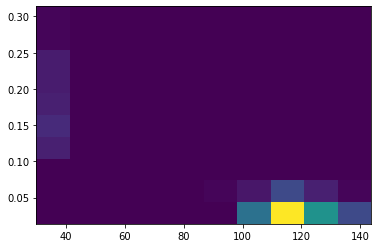

In [12]:
# now try the same for SN2008D
ds = dataset.load_dataset('iPTF13bvn')

N = 200
m_ni = np.empty(N)
t0 = np.empty(N)
for i in range(N):
    p,pcov = late_nickel.sample_fit(ds, bolometric_method='lyman', texpl_mjd=56458.0, t_min=t_min)
    m_ni[i] = p[1]
    t0[i] = p[0]
plt.hist2d(t0, m_ni);


/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/home/welterde/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SN2019odp_phot 0.19866725776917793 0.24863161105509377


/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/home/welterde/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


iPTF13bvn 0.09152166422643344 0.08851505328502363


/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/home/welterde/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SN2008D 0.08199006844495464 0.08178604883240335


/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/home/welterde/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SN2002ap 0.09455832618754982 0.10001949382100228


/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/home/welterde/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SN1998bw 0.2607871693025526 0.21274663207068728


(0.0, 1.0)

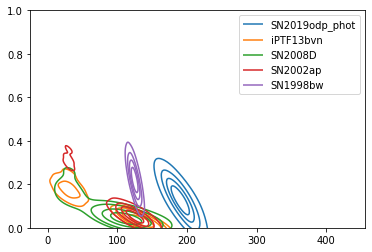

In [25]:
def run_obj(name, texpl_mjd, N=500, t_min=60):
    # now try the same for SN2008D
    ds = dataset.load_dataset(name)
    m_ni = np.empty(N)
    t0 = np.empty(N)
    for i in range(N):
        p,pcov = late_nickel.sample_fit(ds, bolometric_method='lyman', texpl_mjd=texpl_mjd, t_min=t_min, time_samples=50)
        m_ni[i] = p[1]
        t0[i] = p[0]
    seaborn.kdeplot(t0, m_ni, label=name,  thresh=.2, levels=5)
    #seaborn.displot(x=t0, y=m_ni, label=name)
    print(name, np.nanmean(m_ni), np.nanstd(m_ni))

run_obj('SN2019odp_phot', 58714.5)
run_obj('iPTF13bvn', 56458)
run_obj('SN2008D', 54474)
run_obj('SN2002ap', 52303)
run_obj('SN1998bw', 50931)
    
plt.legend()
plt.ylim((0,1))

In [14]:
#late_nickel.total_deposition(1, 100, 0.1, 2)

/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other
/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the f

<ErrorbarContainer object of 3 artists>

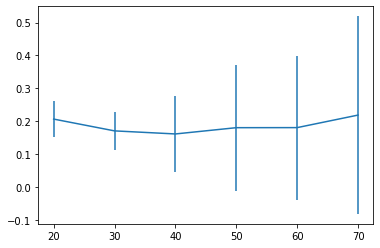

In [15]:
def fit_obj(name, texpl_mjd, N=200, t_min=20):
    # now try the same for SN2008D
    ds = dataset.load_dataset(name)
    m_ni = np.empty(N)
    t0 = np.empty(N)
    for i in range(N):
        p,pcov = late_nickel.sample_fit(ds, bolometric_method='lyman', texpl_mjd=texpl_mjd, t_min=t_min)
        m_ni[i] = p[1]
        t0[i] = p[0]
    return np.mean(m_ni), np.std(m_ni), np.mean(t0), np.std(t0)

rows = []
tmins = [20, 30, 40, 50, 60, 70]
for t_min in tmins:
    x = fit_obj('SN2019odp_phot', 58714.5, t_min=t_min)
    rows.append(x)
mni = [x[0] for x in rows]
mni_err = [x[1] for x in rows]
t0 = [x[2] for x in rows]
t0_err = [x[3] for x in rows]
plt.errorbar(tmins, mni, yerr=mni_err)

<ErrorbarContainer object of 3 artists>

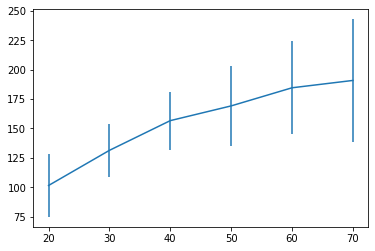

In [16]:
plt.errorbar(tmins, t0, yerr=t0_err)